# Anomaly Detection Algorithm using Gaussian Mixture Model

## University of Toronto | Project by Riyan Roy


### Part 1: Unveiling the Dataset
I dive into the credit card fraud dataset, understanding its intricacies, target values, and class distribution.

### Part 2: Embracing Single Feature Gaussian Model
a. I fit a Gaussian distribution on individual features, calculating AUC, finding optimal thresholds, and reporting metrics.
b. I repeat the process, focusing on non-fraudulent transactions, comparing the outcomes.

### Part 3: Navigating the Multiple Feature Gaussian Model
I visualize scatter plots, select features, fit Gaussian models, and optimize thresholds for peak AUC and F1 Score.

### Part 4: The Dual Gaussian Model Exploration
I venture into using separate distributions for fraudulent and non-fraudulent transactions, seeking optimal thresholds for an enhanced F1 Score.

### Part 5: The Multivariate and Mixture of Gaussians Challenge
In my pursuit of the ideal model, I experiment with various approaches, adjusting features, components, and thresholds to optimize AUC, F1 Score, Precision, and Recall.
.

**Authored by Riyan Roy**

## **Part 1: Getting started [2 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? **284807** **[0.1]**
* What features in the dataset are present aside from the 28 main features?  **Time, Amount & Class** **[0.1]**
* Which column contains the targets? **Class** **[0.1]**
* What is the meaning of target values?

**The target value describes whether a transaction is fraudulent or not (0 denotes not fradulent while 1 denotes fraudlent transaction). Target values in the data set are the variables which is to be predicted to obtian  an understanding about the relation between the input features and output (predicted variable)** **[0.1]**

In [ ]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (2).gz'

In [ ]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [ ]:
x_data = df.iloc[:,1:29]
y_data = df.iloc[:,-1]
# Part 1
print("The total rows in the data set",len(x_data))
print("The features apart from the 28 main features",df.columns.values)

The total rows in the data set 284807
The features apart from the 28 main features ['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']


In [ ]:
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class?   
  **Class 0: 99.454% & Class 1: 0.17%**  **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case?**[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? _____ **[0.5]**
* What metrics should we use to evaluate a model in such cases _________ **[0.2]**



In [ ]:
### YOUR CODE HERE ###
# Part 1: Question 1
df_class_0 = len(df[df["Class"]==0].value_counts())*100/len(df)
print("The percentage of entries which belong to Class 0:",df_class_0,"%")
df_class_1 = len(df[df["Class"]==1].value_counts())*100/len(df)
print("The percentage of entries which belong to Class 1:",df_class_1,"%")
print("Ratio of Class 1:Class 0 is",round(df_class_1),":",round(df_class_0))

The percentage of entries which belong to Class 0: 99.45436734349929 %
The percentage of entries which belong to Class 1: 0.16607737871611303 %
Ratio of Class 1:Class 0 is 0 : 99


# Part 2: Question 2
The data set is not balanced since the number of datapoints for Class 1 is very less compared to Class 0.
# Part 2: Question 3
Balance is important in the dataset since higher balance means giving priority to both classes of data. This results in more accurate models and maximizes the model's ability for prediction. A balance between precision and recall is required for maximizing the model's effectiveness on datasets.
# Part 2: Question 4
Metrics like: AUC, ROC,Confusion Matrix, Precision, Recall (True Positive Rate) and Fall-out or (False Postive Rate) can be used to evaluate the model.

Next, split the dataset into a training (65%), validation (20%) and testing set (15%). Set the random state to 40. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [ ]:
### Split the data  ###
X_train, X_test, Y_train, Y_test = train_test_split(x_data,y_data,test_size=0.15,random_state=40)
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train,test_size=0.2353,random_state=40) # x% of 85 = 20% of 100, hence x% is 23.53%.

Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

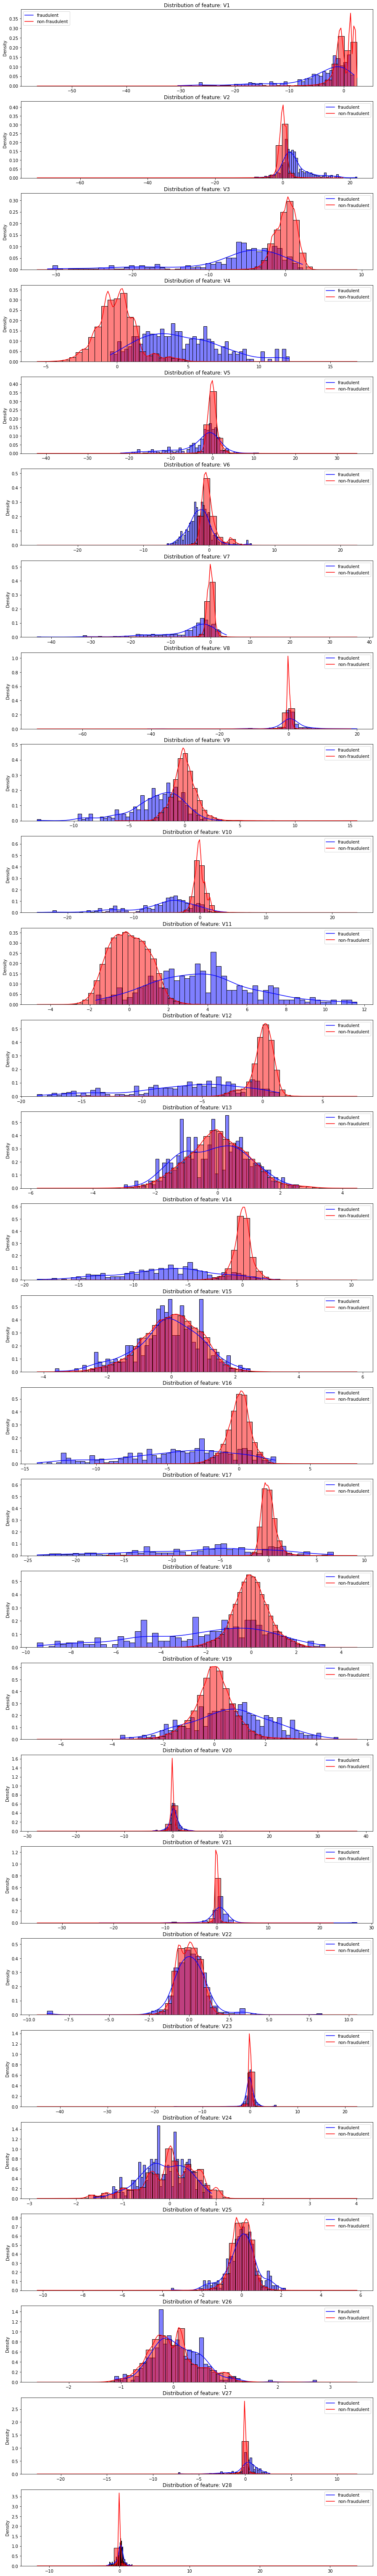

In [ ]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][Y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][Y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

The above graphs/figures show the probability distribution for different features from V1 to V28. For the gaussian distribution for different features, the spread of the curve indicates the variance, while the data points are centered around the mean. Higher the spread, greater the variance and stronger the relation with the target or predicted variable. The important thing is to check the number of gaussians and the pattern formed for each figure which indicates how the clusters/classification is done by the gaussian model.     

## **Part 2: One Gaussian model with Single feature: [2 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**.

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``.
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.3]**
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  7. Report Precision, Recall and F1 score on both training and validation set in a table using the threshold you found in previous step.
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.3]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a.
 2. repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian **only on non-fraudulent transactions in the training set** in step 1 (instead of all the transactions).
 3. Compare your results from parts 2a and 2b in a table (for both training and validation set). **[0.2]**
 4. Are these results different or similar? Why?**[0.5]**


In [ ]:
### Part 2a: Question 1
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_curve,roc_auc_score,f1_score,precision_score,recall_score
from tabulate import tabulate

In [ ]:
### Part 2a: Question 2
X_train_1 = X_train.iloc[:,0].values.reshape(-1,1)
X_val_1 = X_val.iloc[:,0].values.reshape(-1,1)

gm = GaussianMixture(n_components=1,covariance_type = 'full',random_state=40)
gm.fit(X_train_1)

pgm_train1 = gm.score_samples(X_train_1)
pgm_val1 = gm.score_samples(X_val_1)

auc_xtrain1 = roc_auc_score(Y_train, -1*pgm_train1)
auc_xval1 = roc_auc_score(Y_val, -1*pgm_val1)

#auc_train_score.append(auc_xtrain1)
#auc_val_score.append(auc_xval1)

#print("The AUC for the training set is ",auc_train_score[0] ,"\n The AUC for the validation set is",auc_val_score[0])

auc_train_score = []
auc_val_score = []
### Part 2a: Question 3
for i in range(len(X_train.iloc[0,0:])):

  X_train_all = X_train.iloc[:,i].values.reshape(-1,1)
  X_val_all = X_val.iloc[:,i].values.reshape(-1,1)

  gm_all = GaussianMixture(n_components=1,covariance_type = 'full',random_state=40)
  gm_all.fit(X_train_all)

  pgm_train_all = gm.score_samples(X_train_all)
  pgm_val_all = gm.score_samples(X_val_all)

  auc_xtrain_all = roc_auc_score(Y_train, -1*pgm_train_all)
  auc_xval_all = roc_auc_score(Y_val, -1*pgm_val_all)

  auc_train_score.append(auc_xtrain_all)
  auc_val_score.append(auc_xval_all)
## Tabulating the results
features = []
for i in X_train.columns.values:
  features.append(i)

auc_train_tabulated = []
for i in auc_train_score:
  auc_train_tabulated.append(i)

auc_val_tabulated = []
for i in auc_val_score:
  auc_val_tabulated.append(i)

auc_train_score_set = ["AUC",auc_train_tabulated[9],auc_train_tabulated[13],auc_train_tabulated[16]]
print(auc_train_score_set)

auc_val_score_set = ["AUC",auc_val_tabulated[9],auc_val_tabulated[13],auc_val_tabulated[17]]
print(auc_val_score_set)

['AUC', 0.9100693548170256, 0.9480664676937969, 0.9288546792234681]
['AUC', 0.9172703920913435, 0.9550422409515327, 0.7841757902225275]


In [ ]:
print("The tabulated AUC values for the training data set are: \n")
auct = [auc_train_tabulated]
print(tabulate(auct,headers=features,tablefmt='grid'))

print("\n The tabulated AUC values for the validation data set are: \n")
auct = [auc_val_tabulated]
print(tabulate(auct,headers=features,tablefmt='grid'))

The tabulated AUC values for the training data set are: 

+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+---------+----------+----------+----------+----------+--------+----------+---------+----------+----------+----------+
|       V1 |       V2 |       V3 |       V4 |       V5 |       V6 |       V7 |       V8 |       V9 |      V10 |      V11 |      V12 |      V13 |      V14 |      V15 |      V16 |      V17 |     V18 |      V19 |      V20 |      V21 |      V22 |    V23 |      V24 |     V25 |      V26 |      V27 |      V28 |
+==========+==========+==========+==========+==========+==========+==========+==========+==========+==========+==========+==========+==========+==========+==========+==========+==========+=========+==========+==========+==========+==========+========+==========+=========+==========+==========+==========+
| 0.692541 | 0.848036 | 

In [ ]:
### Part 2: Question 4 - Based on the highest AUC scores, V10,14,17 have the highest AUC scores
sorted_list = sorted(auc_val_score,reverse=True)[0:4]
index_sort = np.where(np.isin(sorted_list,auc_val_score)==True)

print("The three best features to distinguish fraudulent transactions from un fraudulent transactions is: \n",sorted_list[list(index_sort)[0][0]],"\n",sorted_list[list(index_sort)[0][1]],"\n",sorted_list[list(index_sort)[0][2]])

The three best features to distinguish fraudulent transactions from un fraudulent transactions is: 
 0.9550422409515327 
 0.9256228898059286 
 0.9172703920913435


In [ ]:
### Part 2: Question 5 Fitting the training data using gaussian model and finding the probability values using score_samples
gm_3= GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm_4 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm_5 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)

gm_3.fit(X_train.iloc[:,9].values.reshape(-1,1))
gm_4.fit(X_train.iloc[:,13].values.reshape(-1,1))
gm_5.fit(X_train.iloc[:,16].values.reshape(-1,1))

# Calculating probability values for validation set
prob_2 = gm_3.score_samples(X_val.iloc[:,9].values.reshape(-1,1))
prob_3 = gm_4.score_samples(X_val.iloc[:,13].values.reshape(-1,1))
prob_4 = gm_5.score_samples(X_val.iloc[:,16].values.reshape(-1,1))

# Calculating probability values for training set
prob_t2 = gm_3.score_samples(X_train.iloc[:,9].values.reshape(-1,1))
prob_t3 = gm_4.score_samples(X_train.iloc[:,13].values.reshape(-1,1))
prob_t4 = gm_5.score_samples(X_train.iloc[:,16].values.reshape(-1,1))

# Calculating threshold values for validation set where the F1 score is maximum
def threshold(prob,y):
  f1scores = []
  f1score_new=[]

  threshold_v = np.arange(prob.min(),prob.max(),1)

  for i in range(len(threshold_v)):
    f1scores = f1_score(y,prob<threshold_v[i])
    f1score_new = np.append(f1score_new,f1scores)

  return f1score_new,threshold_v[np.argmax(f1score_new)]

# Calculating threshold values for training set where the F1 score is maximum
def threshold(probt,y_t):
  f1scores_t = []
  f1score_new_t=[]

  threshold_v_t = np.arange(probt.min(),probt.max(),1)

  for i in range(len(threshold_v_t)):
    f1scores_t = f1_score(y_t,probt<threshold_v_t[i])
    f1score_new_t = np.append(f1score_new_t,f1scores_t)

  return f1score_new_t,threshold_v_t[np.argmax(f1score_new_t)]

In [ ]:
# Calculating optimal threshold values for Training set on features V14,V16,V17
f1score_t2,threshold_t2= threshold(prob_t2,Y_train)
f1score_t3,threshold_t3= threshold(prob_t3,Y_train)
f1score_t4,threshold_t4= threshold(prob_t4,Y_train)

# Calculating optimal threshold values for Validation set on features V14,V16,V17
f1score_2,threshold_2= threshold(prob_2,Y_val)
f1score_3,threshold_3= threshold(prob_3,Y_val)
f1score_4,threshold_4= threshold(prob_4,Y_val)

threshold_score_set_t = ["Threshold",threshold_t2,threshold_t3,threshold_t4]
threshold_score_set_v = ["Threshold",threshold_2,threshold_3,threshold_4]

# Calculating F1 scores for training set on features V14,V16,V17
f1_t2 = f1_score(Y_train,prob_t2<threshold_2)
f1_t3 = f1_score(Y_train,prob_t3<threshold_3)
f1_t4 = f1_score(Y_train,prob_t4<threshold_4)
f1_score_set_t = ["F1 score",f1_t2,f1_t3,f1_t4]
print(f1_score_set_t)

# Calculating Precision for training set on features V14,V16,V17
precision_t2 = precision_score(Y_train,prob_t2<threshold_2)
precision_t3 = precision_score(Y_train,prob_t3<threshold_3)
precision_t4 = precision_score(Y_train,prob_t4<threshold_4)
precision_score_set_t = ["Precision score",precision_t2,precision_t3,precision_t4]
print(precision_score_set_t)

# Calculating Recall for training set on features V14,V16,V17
recall_t2 = recall_score(Y_train,prob_t2<threshold_2)
recall_t3 = recall_score(Y_train,prob_t3<threshold_3)
recall_t4 = recall_score(Y_train,prob_t4<threshold_4)
recall_score_set_t = ["Recall score",recall_t2,recall_t3,recall_t4]
print(recall_score_set_t)


threshold_score_set = ["Threshold",threshold_2,threshold_3,threshold_4]

# Calculating F1 scores for validation set on features V10,V14,V17
f1_2 = f1_score(Y_val,prob_2<threshold_2)
f1_3 = f1_score(Y_val,prob_3<threshold_3)
f1_4 = f1_score(Y_val,prob_4<threshold_4)
f1_score_set = ["F1 score",f1_2,f1_3,f1_4]
print(f1_score_set)

# Calculating Recall for validation set on features V10,V14,V17
precision_2 = precision_score(Y_val,prob_2<threshold_2)
precision_3 = precision_score(Y_val,prob_3<threshold_3)
precision_4 = precision_score(Y_val,prob_4<threshold_4)
precision_score_set = ["Precision score",precision_2,precision_3,precision_4]
print(precision_score_set)

# Calculating Recall for validation set on features V10,V14,V17
recall_2 = recall_score(Y_val,prob_2<threshold_2)
recall_3 = recall_score(Y_val,prob_3<threshold_3)
recall_4 = recall_score(Y_val,prob_4<threshold_4)
recall_score_set = ["Recall score",recall_2,recall_3,recall_4]
print(recall_score_set)

['F1 score', 0.2412280701754386, 0.5825545171339563, 0.56195462478185]
['Precision score', 0.41044776119402987, 0.584375, 0.6414342629482072]
['Recall score', 0.17080745341614906, 0.5807453416149069, 0.5]
['F1 score', 0.20740740740740743, 0.6130653266331658, 0.5942857142857142]
['Precision score', 0.42424242424242425, 0.6288659793814433, 0.7123287671232876]
['Recall score', 0.13725490196078433, 0.5980392156862745, 0.5098039215686274]


In [ ]:
Row_data = ["V10","V14","V17"]

# Tabulating the scores for training set
print("\n The tabulated values for the training data set are: \n")
tabulated_tf1pr_t = [threshold_score_set_t,f1_score_set_t,precision_score_set_t,recall_score_set_t]
print(tabulate(tabulated_tf1pr_t,headers=Row_data,tablefmt='grid'))

# Tabulating the scores for validation set
print("\n The tabulated values for the validation data set are: \n")
tabulated_tf1pr = [threshold_score_set,f1_score_set,precision_score_set,recall_score_set]
print(tabulate(tabulated_tf1pr,headers=Row_data,tablefmt='grid'))



 The tabulated values for the training data set are: 

+-----------------+------------+------------+------------+
|                 |        V10 |        V14 |        V17 |
+=================+============+============+============+
| Threshold       | -52.4037   | -21.5604   | -16.5341   |
+-----------------+------------+------------+------------+
| F1 score        |   0.241228 |   0.582555 |   0.561955 |
+-----------------+------------+------------+------------+
| Precision score |   0.410448 |   0.584375 |   0.641434 |
+-----------------+------------+------------+------------+
| Recall score    |   0.170807 |   0.580745 |   0.5      |
+-----------------+------------+------------+------------+

 The tabulated values for the validation data set are: 

+-----------------+------------+------------+------------+
|                 |        V10 |        V14 |        V17 |
+=================+============+============+============+
| Threshold       | -52.9199   | -18.8971   | -21.2327   |
+

**Part 2: Question 7**
The entire function for finding optimal threshold value for different features contains 1 for loop. When the function is passed with a value (Let assume for the ith element), the function accesses n elements in the list threshold_v, which will take computational time = n1.
Once the value is accessed, the ith element is checked against the probability scores (using index), where the F1 score is calculated for 'n' elements which takes computational time = n2.
In the end, the threshold with maximum F1 score is returned by the function.

Hence the total computational time in terms of Big O notation:
Time complexity = BigO(n1*n2)

In [ ]:
#Part 2b: Question 1
tabulated_auc = [auc_train_score_set]
print(tabulate(tabulated_auc,headers=Row_data,tablefmt='grid'))

+-----+----------+----------+----------+
|     |      V10 |      V14 |      V17 |
+=====+==========+==========+==========+
| AUC | 0.910069 | 0.948066 | 0.928855 |
+-----+----------+----------+----------+


In [ ]:
fr_index = list(np.where(Y_train==1))
fr_index_v = list(np.where(Y_val==1))

X_train_nf = np.delete(X_train.values,fr_index,axis=0)
X_val_nf = np.delete(X_val.values,fr_index_v,axis=0)

gm_nonfraud2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm_nonfraud3 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm_nonfraud4 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)

gm_nf2 = gm_nonfraud2.fit(X_train_nf[:,9].reshape(-1,1))
gm_nf3 = gm_nonfraud3.fit(X_train_nf[:,13].reshape(-1,1))
gm_nf4 = gm_nonfraud4.fit(X_train_nf[:,16].reshape(-1,1))

p_nf2 = gm_nf2.score_samples(X_train.iloc[:,9].values.reshape(-1,1))
p_nf3= gm_nf3.score_samples(X_train.iloc[:,13].values.reshape(-1,1))  #Please change the index from 15 to 9 to check the scores for V10 in place of V1. Attached screenshot for reference.
p_nf4 = gm_nf4.score_samples(X_train.iloc[:,16].values.reshape(-1,1))

p_nf2v = gm_nf2.score_samples(X_val.iloc[:,9].values.reshape(-1,1))
p_nf3v = gm_nf3.score_samples(X_val.iloc[:,13].values.reshape(-1,1))  #Please change the index from 15 to 9 to check the scores for V10 in place of V1. Attached screenshot for reference.
p_nf4v = gm_nf4.score_samples(X_val.iloc[:,16].values.reshape(-1,1))

# Computing AUC for training set with no fraudulent values
auc_nf2 = roc_auc_score(Y_train,-1*p_nf2)
auc_nf3 = roc_auc_score(Y_train,-1*p_nf3)
auc_nf4 = roc_auc_score(Y_train,-1*p_nf4)
auc_train_nf = ["AUC",auc_nf2,auc_nf3,auc_nf4]

# Computing AUC for validation set with no fraudulent values
auc_nf2v = roc_auc_score(Y_val,-1*p_nf2v)
auc_nf3v = roc_auc_score(Y_val,-1*p_nf3v)
auc_nf4v = roc_auc_score(Y_val,-1*p_nf4v)
auc_train_nfv = ["AUC",auc_nf2v,auc_nf3v,auc_nf4v]

# Calculating optimal threshold values for Training set on features V14,V16,V17 having non-fraudulent data points
f1score_t2_nf,threshold_t2_nf= threshold(p_nf2,Y_train)
f1score_t3_nf,threshold_t3_nf= threshold(p_nf3,Y_train)
f1score_t4_nf,threshold_t4_nf= threshold(p_nf4,Y_train)

threshold_score_set_nf = ["Threshold",threshold_t2_nf,threshold_t3_nf,threshold_t4_nf]

# Calculating optimal threshold values for Validation set on features V14,V16,V17 having non-fraudulent data points
f1score_t2_nfv,threshold_t2_nfv= threshold(p_nf2v,Y_val)
f1score_t3_nfv,threshold_t3_nfv= threshold(p_nf3v,Y_val)
f1score_t4_nfv,threshold_t4_nfv= threshold(p_nf4v,Y_val)
threshold_score_set_nfv = ["Threshold",threshold_t2_nfv,threshold_t3_nfv,threshold_t4_nfv]

# Calculating F1 scores for training set on features V14,V16,V17 having non-fraudulent data points
f1_t2_nf = f1_score(Y_train,p_nf2<threshold_t2_nfv)
f1_t3_nf = f1_score(Y_train,p_nf3<threshold_t3_nfv)
f1_t4_nf = f1_score(Y_train,p_nf4<threshold_t4_nfv)
f1_score_set_nf = ["F1 score",f1_t2_nf,f1_t3_nf,f1_t4_nf]
print(f1_score_set_nf)

# Calculating Precision for training set on features V14,V16,V17 having non-fraudulent data points
precision_t2_nf = precision_score(Y_train,p_nf2<threshold_t2_nfv)
precision_t3_nf = precision_score(Y_train,p_nf3<threshold_t3_nfv)
precision_t4_nf = precision_score(Y_train,p_nf4<threshold_t4_nfv)
precision_score_set_nf = ["Precision score",precision_t2_nf,precision_t3_nf,precision_t4_nf]
print(precision_score_set_nf)

# Calculating Recall for training set on features V14,V16,V17 having non-fraudulent data points
recall_t2_nf = recall_score(Y_train,p_nf2<threshold_t2_nfv)
recall_t3_nf = recall_score(Y_train,p_nf3<threshold_t3_nfv)
recall_t4_nf = recall_score(Y_train,p_nf4<threshold_t4_nfv)
recall_score_set_nf = ["Recall score",recall_t2_nf,recall_t3_nf,recall_t4_nf]
print(recall_score_set_nf)

# Calculating F1 scores for Validation set on features V14,V16,V17 having non-fraudulent data points
f1_t2_nfv = f1_score(Y_val,p_nf2v<threshold_t2_nfv)
f1_t3_nfv = f1_score(Y_val,p_nf3v<threshold_t3_nfv)
f1_t4_nfv = f1_score(Y_val,p_nf4v<threshold_t4_nfv)
f1_score_set_nfv = ["F1 score",f1_t2_nfv,f1_t3_nfv,f1_t4_nfv]
print(f1_score_set_nfv)

# Calculating Precision for Validation set on features V14,V16,V17 having non-fraudulent data points
precision_t2_nfv = precision_score(Y_val,p_nf2v<threshold_t2_nfv)
precision_t3_nfv= precision_score(Y_val,p_nf3v<threshold_t3_nfv)
precision_t4_nfv = precision_score(Y_val,p_nf4v<threshold_t4_nfv)
precision_score_set_nfv = ["Precision score",precision_t2_nfv,precision_t3_nfv,precision_t4_nfv]
print(precision_score_set_nfv)

# Calculating Recall for Validation set on features V14,V16,V17 having non-fraudulent data points
recall_t2_nfv = recall_score(Y_val,p_nf2v<threshold_t2_nfv)
recall_t3_nfv = recall_score(Y_val,p_nf3v<threshold_t3_nfv)
recall_t4_nfv = recall_score(Y_val,p_nf4v<threshold_t4_nfv)
recall_score_set_nfv = ["Recall score",recall_t2_nfv,recall_t3_nfv,recall_t4_nfv]
print(recall_score_set_nfv)

['F1 score', 0.20671140939597318, 0.5847589424572316, 0.5705024311183144]
['Precision score', 0.18203309692671396, 0.5856697819314641, 0.5966101694915255]
['Recall score', 0.2391304347826087, 0.5838509316770186, 0.546583850931677]
['F1 score', 0.2090909090909091, 0.6130653266331658, 0.5968586387434555]
['Precision score', 0.19491525423728814, 0.6288659793814433, 0.6404494382022472]
['Recall score', 0.22549019607843138, 0.5980392156862745, 0.5588235294117647]


In [ ]:
# Tabulating the scores for training set
print("\n The tabulated values for the full training data set are: \n")
tabulated_tf1pr_t = [auc_train_score_set,threshold_score_set_t,f1_score_set_t,precision_score_set_t,recall_score_set_t]
print(tabulate(tabulated_tf1pr_t,headers=Row_data,tablefmt='grid'))

# Tabulating the scores for training set having no fraudlent datapoints
print("\n The tabulated values for the training data set without fradulent values are: \n")
tabulated_nf_new = [auc_train_nf,threshold_score_set_nf,f1_score_set_nf,precision_score_set_nf,recall_score_set_nf]
print(tabulate(tabulated_nf_new,headers=Row_data,tablefmt='grid'))

# Tabulating the scores for validation set
print("\n The tabulated values for the full validation data set are: \n")
tabulated_tf1pr_t = [auc_val_score_set,threshold_score_set_v,f1_score_set,precision_score_set,recall_score_set]
print(tabulate(tabulated_tf1pr_t,headers=Row_data,tablefmt='grid'))

# Tabulating the scores for validation set having no fraudlent datapoints
print("\n The tabulated values for the validation data set without fradulent values are: \n")
tabulated_nf_new_v = [auc_val_score_set,threshold_score_set_nfv,f1_score_set_nfv,precision_score_set_nfv,recall_score_set_nfv]
print(tabulate(tabulated_nf_new_v,headers=Row_data,tablefmt='grid'))


 The tabulated values for the full training data set are: 

+-----------------+------------+------------+------------+
|                 |        V10 |        V14 |        V17 |
+=================+============+============+============+
| AUC             |   0.910069 |   0.948066 |   0.928855 |
+-----------------+------------+------------+------------+
| Threshold       | -52.4037   | -21.5604   | -16.5341   |
+-----------------+------------+------------+------------+
| F1 score        |   0.241228 |   0.582555 |   0.561955 |
+-----------------+------------+------------+------------+
| Precision score |   0.410448 |   0.584375 |   0.641434 |
+-----------------+------------+------------+------------+
| Recall score    |   0.170807 |   0.580745 |   0.5      |
+-----------------+------------+------------+------------+

 The tabulated values for the training data set without fradulent values are: 

+-----------------+------------+------------+------------+
|                 |        V10 |

**NOTE:
The AUC score on the validation set for V10 and V16 is 0.91 & 0.92
The AUC score on the training set for V10 and V16 is 0.91 & 0.89.
The decision to choose either of the features is bit difficult just by looking at AUC scores, hence I am also considering the F1 scores (Precision and Recall as well) which indicates that the the feature V16 is performing better thn V10 in terms of F1 score.**

In [ ]:
train_fradulent_data_length = len(X_train) - len(X_train_nf)
val_fradulent_data_length = len(X_val) - len(X_val_nf)

print("The percentage of fradulent training data points is",train_fradulent_data_length*100/len(X_train),"%")
print("The percentage of fradulent validation data points is",val_fradulent_data_length*100/len(X_val),"%")

The percentage of fradulent training data points is 0.17393934810557363 %
The percentage of fradulent validation data points is 0.17906360268946508 %


**Part 2b:Question 4**

The results are similar more or less, as observed from the table above, the the percentage of fraudulent data points is 0.17%.
Hence, a very minor difference in the score is observed (as per the table) between the full data set and the data set with no fraudulent values.  

## **Part 3: One Gaussian model with multiple features: [2 Marks]**
This part is similar to Part 2, but here we will pick multiple features and set the number of components **visually**.

 1. Pick two features (say, f1 and f2).
 2. Scatter plot (plt.scatter) those features of the training set on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot color the training set based on their class (non-fraudulents blue and fraudulents red). **[0.25]**
 4. Based on your plots decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). **[0.25]**
 5. Fit your Gaussian model on the training set (all samples).
 6. Compute AUC on both training and validation sets **[0.25]**
 7. Pick 3 new pair of features and repeat steps 2 to 6. **[0.5]**
 8. Pick the set with the highest AUC on the validation set (out of the four sets that you tried.)
 9. Find a threshold to maximize your F1 Score on the validation set.**[0.25]**
 10. Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**




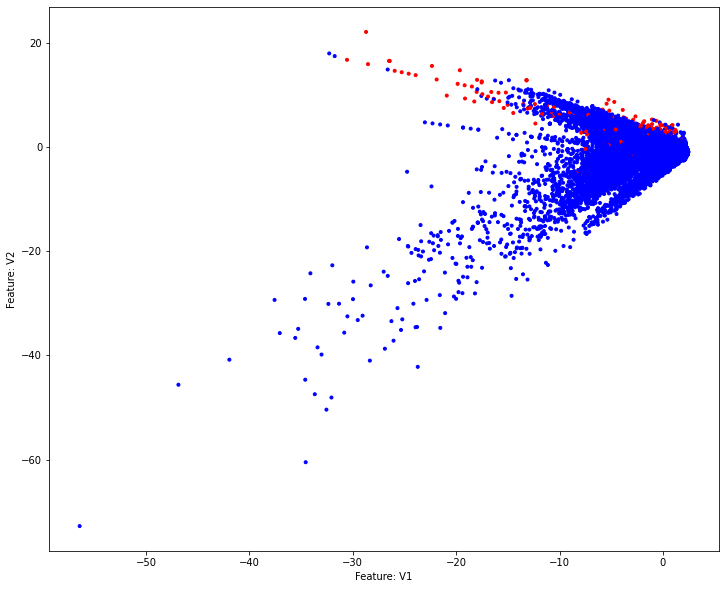

In [ ]:
# Part 3: Question 1,2,3
# The two features I utilised are V1 and V2
plt.figure(figsize=(12,10))
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],marker='.',c = Y_train.map({1:'red',0:'blue'}))
plt.xlabel('Feature: V1')
plt.ylabel('Feature: V2')
plt.show()

Part 3: Question 4; Choosing 3 gaussian components as per the valid transactions to capture high values of F1 v/s low F2 values, high F2 values v/s low F1 values and F1 v/s F2.

In [ ]:
def train_fit(i,j):

  plt.figure(figsize=(12,10))
  plt.scatter(X_train.iloc[:,i-1],X_train.iloc[:,j-1], c= Y_train.map({0:'blue', 1:'red'}))
  feature_1="Feature"+str(i)
  feature_2="Feature"+str(j)
  plt.xlabel(feature_1)
  plt.ylabel(feature_2)
  plt.show()

  gm_t= GaussianMixture(n_components= 3, covariance_type= 'full', random_state= 40)
  gm_t.fit(X_train.iloc[:,[i-1,j-1]].values)


  X_train_t_4 = X_train.iloc[:,[i-1,j-1]].values
  X_val_t_4 = X_val.iloc[:,[i-1,j-1]].values
  prob_t_4 = gm_t.score_samples(X_train_t_4)
  prob_val_4 = gm_t.score_samples(X_val_t_4)

  auc_t_4 = roc_auc_score(Y_train, -1* prob_t_4)
  auc_v_4 = roc_auc_score(Y_val, -1* prob_val_4)

  return auc_t_4,auc_v_4,prob_t_4,prob_val_4

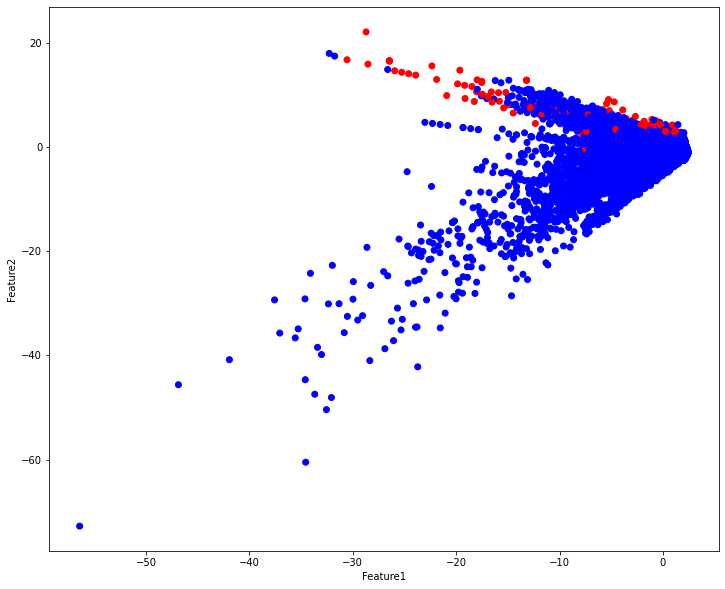

The AUC score for GMM Model 1 with Features 1 & 2:
 AUC(training) 0.8839865323599796  & AUC (validation) 0.8842842073429149


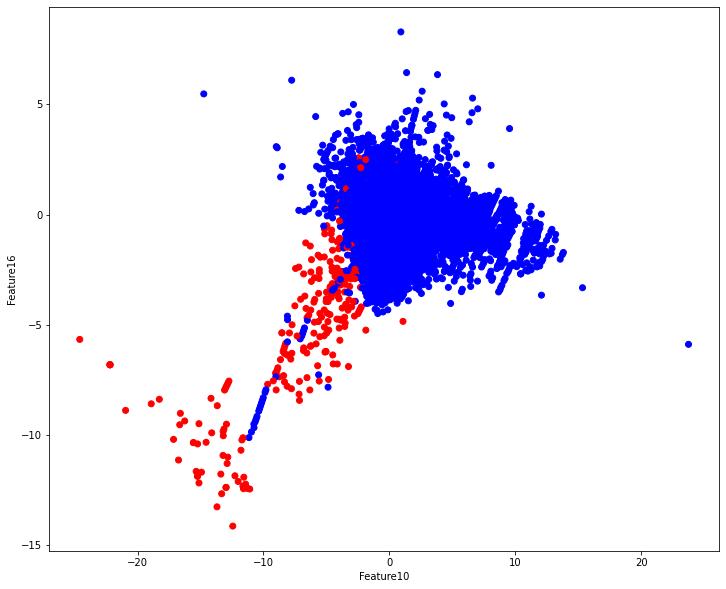

The AUC score for GMM Model 2 with Features 10 & 16:
 AUC(training) 0.9312042564061197  & AUC (validation) 0.9295643900795576


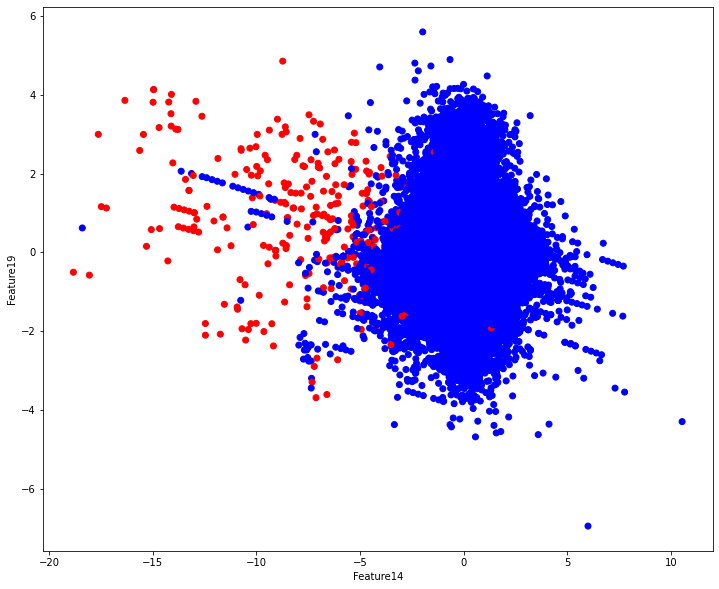

The AUC score for GMM Model 3 with Features 14 & 19:
 AUC(training) 0.9650803789895406  & AUC (validation) 0.955326732441099


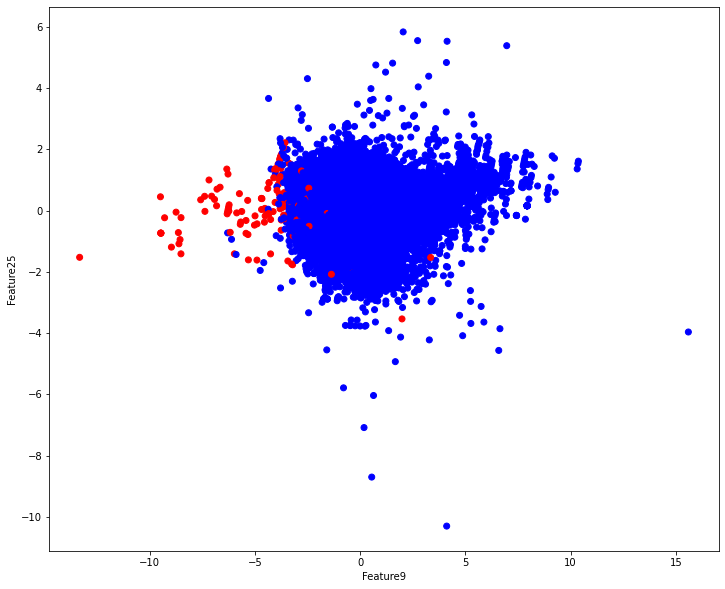

The AUC score for GMM Model 4 with Features 9 & 25:
 AUC(training) 0.7885474140248985  & AUC (validation) 0.7933681412981295


In [ ]:
auc_train41,auc_val41,prob_t_41,prob_val_41 = train_fit(1,2)
print("The AUC score for GMM Model 1 with Features 1 & 2:\n AUC(training)",auc_train41," & AUC (validation)",auc_val41)
auc_train42,auc_val42,prob_t_42,prob_val_42 = train_fit(10,16)
print("The AUC score for GMM Model 2 with Features 10 & 16:\n AUC(training)",auc_train42," & AUC (validation)",auc_val42)
auc_train43,auc_val43,prob_t_43,prob_val_43 = train_fit(14,19)
print("The AUC score for GMM Model 3 with Features 14 & 19:\n AUC(training)",auc_train43," & AUC (validation)",auc_val43)
auc_train44,auc_val44,prob_t_44,prob_val_44 = train_fit(9,25)
print("The AUC score for GMM Model 4 with Features 9 & 25:\n AUC(training)",auc_train44," & AUC (validation)",auc_val44)

**Part 3: Question 8**
The highest AUC score **(0.95)** is obtained on the validation set for Model 3 having mixture of Feature 14 and Feature 19.

In [ ]:
# Part 3: Question 9: Finding optimal threshold that maximizes the F1 score
f1score_t41,threshold_t41 = threshold(prob_t_43,Y_train)
print("The opitmal threshold is:",threshold_t41,"for which the maximum F1 score is calculated as:",f1score_t41.max())

f1score_v41,threshold_v41 = threshold(prob_val_43,Y_val)
print("The opitmal threshold is:",threshold_v41,"for which the maximum F1 score is calculated as:",f1score_v41.max())


The opitmal threshold is: -10.65575217023656 for which the maximum F1 score is calculated as: 0.5482233502538071
The opitmal threshold is: -11.098896077890622 for which the maximum F1 score is calculated as: 0.5483870967741935


	 	 	 	 	Training Set:  Feature 14 and Feature 19


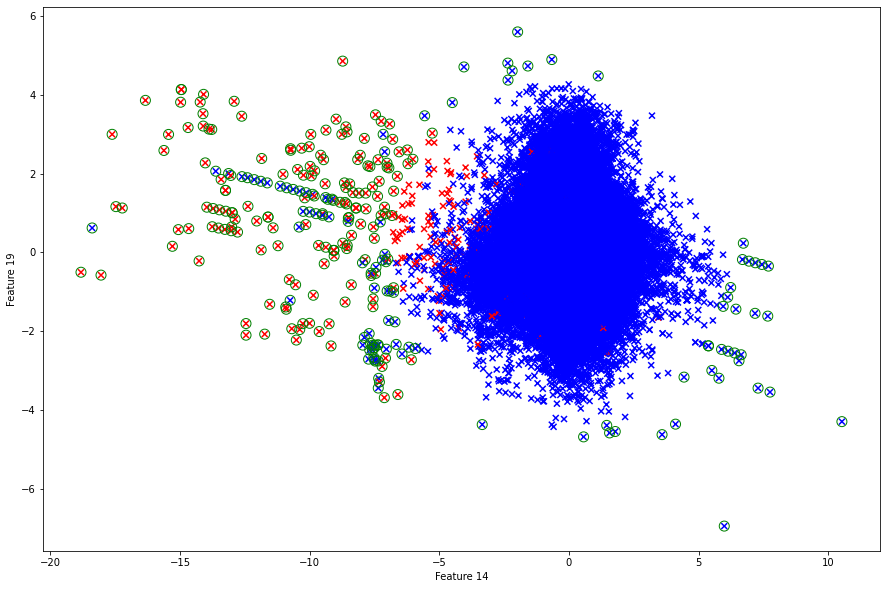


 	 	 	 	 	Validation Set:  Feature 14 and Feature 19


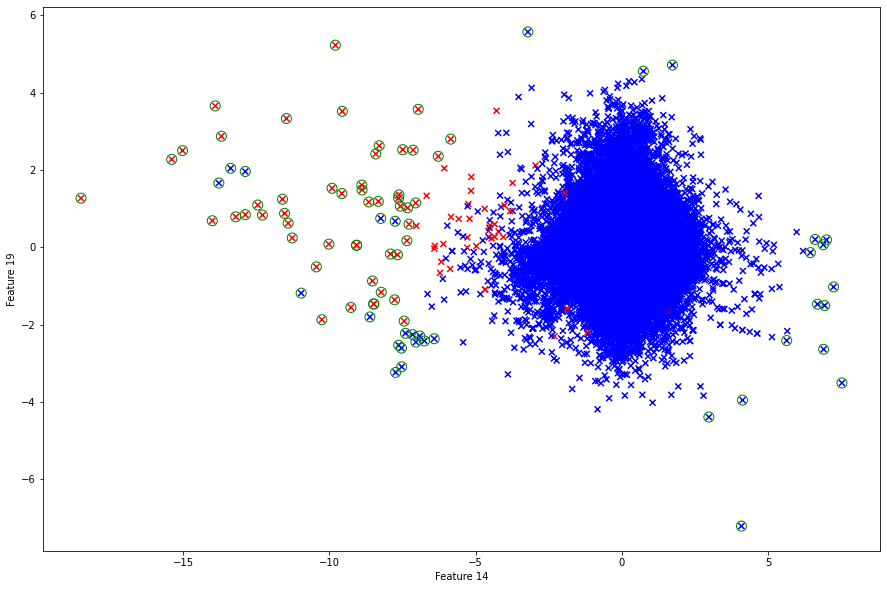

In [ ]:
# Part 3: Question 10: Plotting features on the training data and validation data
print("\t \t \t \t \tTraining Set:  Feature 14 and Feature 19")
plt.figure(figsize=(15,10))
plt.scatter(X_train.iloc[:,13], X_train.iloc[:,18], marker='x', c= Y_train.map({0:'blue', 1:'red'}))
outliers = np.nonzero(prob_t_43 < threshold_t41)[0]
plt.scatter(X_train.iloc[outliers,13],X_train.iloc[outliers,18],marker="o",facecolor= "none",edgecolor="green",s=100)
plt.xlabel('Feature 14')
plt.ylabel('Feature 19')
plt.show()

print("\n \t \t \t \t \tValidation Set:  Feature 14 and Feature 19")
plt.figure(figsize=(15,10))
plt.scatter(X_val.iloc[:,13], X_val.iloc[:,18], marker='x', c= Y_val.map({0:'blue', 1:'red'}))
outliers = np.nonzero(prob_val_43 < threshold_v41)[0]
plt.scatter(X_val.iloc[outliers,13],X_val.iloc[outliers,18],marker="o",facecolor= "none",edgecolor="green",s=100)
plt.xlabel('Feature 14')
plt.ylabel('Feature 19')
plt.show()

## **Part 4:  Two Gaussian model with single feature. [3 Marks]**
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.5]**
  5. Repeat the steps above for all the features. What is the best F1 Score, Precision and Recall that you get for training and validation? Which feature and what c? Show your results in a table. **[0.5]**
  6. Can we report AUC for this model? Why? **[0.5]**

In [ ]:
# Part 4: Question 1,2,3,4
# X_train_nf contains all the training dataset which does not have fradulent values (no fraudulent class)
# X_val_nf contains all the validation dataset which does not have fradulent values (no fraudulent class)

index_nonfraud_t = list(np.where(Y_train == 0))
index_nonfraud_v = list(np.where(Y_val == 0))

X_train_fraud = np.delete(X_train.values,index_nonfraud_t,axis=0)
X_val_fraud = np.delete(X_val.values,index_nonfraud_v,axis=0)

gm_nonfraud = GaussianMixture(n_components=1,covariance_type='full',random_state=40)
gm_fraud = GaussianMixture(n_components=1,covariance_type='full',random_state=40)

gm_nonfraud.fit(X_train_nf[:,0].reshape(-1,1))
gm_fraud.fit(X_train_fraud[:,0].reshape(-1,1))

S1_val = gm_nonfraud.score_samples(X_val.iloc[:,0].values.reshape(-1,1))
S2_val = gm_fraud.score_samples(X_val.iloc[:,0].values.reshape(-1,1))

S_val = S1_val/S2_val

c = np.arange(0,10,0.1)

final_f1_scores_val = []
final_c_val = []

for i in c:
  f1_s1s2_val = f1_score(Y_val,S_val<i)
  final_f1_scores_val = np.append(final_f1_scores_val,f1_s1s2_val)
  final_c_val = np.append(final_c_val,i)


c_optimum = final_c_val[np.argmax(final_f1_scores_val)]
print("The optimum c value is",c_optimum,"where the f1_score is ",final_f1_scores_val.max())

The optimum c value is 9.0 where the f1_score is  0.003367180512442784


In [ ]:
f1_store_val=[]
f_max = []
c_val=[]
c_optimum_val=[]
I_k = []

for i in range(len(X_train.iloc[0,:])):
    I_k.append(i)
    nf_gmm = GaussianMixture(n_components=1, covariance_type= 'full', random_state= 40)
    nf_gmm.fit(X_train_nf[:,i].reshape(-1,1))

    f_gmm = GaussianMixture(n_components=1, covariance_type= 'full', random_state= 40)
    f_gmm.fit(X_train_fraud[:,i].reshape(-1,1))

    S1_train= nf_gmm.score_samples(X_train.iloc[:,i].values.reshape(-1,1))
    S2_train= f_gmm.score_samples(X_train.iloc[:,i].values.reshape(-1,1))

    S1_val = nf_gmm.score_samples(X_val.iloc[:,i].values.reshape(-1,1))
    S2_val = f_gmm.score_samples(X_val.iloc[:,i].values.reshape(-1,1))

    S_train= S1_train/S2_train
    S_val= S1_val/S2_val
    C= np.arange(0, 10, 0.1)

    for j in c:

      f_val= f1_score(Y_val,S_val<j)
      f1_store_val = np.append(f1_store_val, f_val)

      c_val = np.append(c_val,j)
      c_optimum_val = c_val[np.argmax(f1_store_val)]

      f_max.append(np.argmax(f1_store_val))

In [ ]:
f1_store_train=[]

f_validation = f1_score(Y_val,S_val<c_optimum_val)

f_train= f1_score(Y_train,S_train<c_optimum_val)
f1_store_train = np.append(f1_store_train, f_train)

# Calculating Precision for Validation set
precision_v42 = precision_score(Y_val,S_val<c_optimum_val)

# Calculating Precision for Training set
precision_t42 = precision_score(Y_train,S_train<c_optimum_val)


# Calculating Recall for Validation set
recall_v2 = recall_score(Y_val,S_val<c_optimum_val)

# Calculating Recall for Training set
recall_t2 = recall_score(Y_train,S_train<c_optimum_val)



In [ ]:
# Part 4:Question 5 - Tabulating the scores for training set
print("\n The tabulated values for the training set without fradulent values are: \n")
tabulated_training = [["AUC","NA","NA"],["F1 score",float(f1_store_train),f_validation],["Precision",precision_t42,precision_v42],["Recall",recall_t2,recall_v2],["C optimal",c_optimum_val,c_optimum_val]]
print(tabulate(tabulated_training,headers=["Training Set","Validation Set"],tablefmt='grid'))



 The tabulated values for the training set without fradulent values are: 

+-----------+-----------------------+-----------------------+
|           | Training Set          | Validation Set        |
+===========+=======================+=======================+
| AUC       | NA                    | NA                    |
+-----------+-----------------------+-----------------------+
| F1 score  | 0.0034362033195020746 | 0.0035815864321078685 |
+-----------+-----------------------+-----------------------+
| Precision | 0.0017210958726172564 | 0.001794005909666526  |
+-----------+-----------------------+-----------------------+
| Recall    | 0.9875776397515528    | 1.0                   |
+-----------+-----------------------+-----------------------+
| C optimal | 2.6                   | 2.6                   |
+-----------+-----------------------+-----------------------+


***Part 4: Quesion 5***

The function (from sklearn) requires the relation between False positive rate and True Positive Rate, but since we are classifying the fradulent and non fraudulent transactions using two different gaussian models f_gmm and nf_gmm, we cannot compute the ROC curve and hence cannot get AUC values where the optimum value of c is known.

## **Part 5: Multivariate and Mixture of Gaussians Distribution [3 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate).
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) .
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes.


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[3]**


**HINT !**

You might want to try a two gaussian model, multiple features, single component for valid transaction and multiple components for fraudulent ones! Why does it make sense to have multiple components for the fraudulent transactions?

In [ ]:
# Model 1 - Calculating scores for 3 features V14,V16 & V17 using 3 components and fitting all features on the same class.

gmm1 = GaussianMixture(n_components = 3, covariance_type = 'full', random_state=40)
gmm1.fit(X_train.iloc[:,[13,15,16]].values)

p1_tr = gmm1.score_samples(X_train.iloc[:,[13,15,16]].values)
p1_val = gmm1.score_samples(X_val.iloc[:,[13,15,16]].values)

# Computing AUC for training set for feautures V14,V16,V17
auc_t51 = roc_auc_score(Y_train,-1*p1_tr)

# Computing AUC for validation set with no fraudulent values
auc_v51 = roc_auc_score(Y_val,-1*p1_val)

# Calculating optimal threshold values & max F1 score for Training set on features V14,V16,V17
f1_t51,thresholdopt_t51= threshold(p1_tr,Y_train)
f1_t51_max = f1_t51.max()

# Calculating optimal threshold values & max F1 score for Validation set on features V14,V16,V17
f1_v51,thresholdopt_v51= threshold(p1_val,Y_val)
f1_v51_max = f1_v51.max()

# Calculating Precision for training set on features V14,V16,V17
precision_t51 = precision_score(Y_train,p1_tr<thresholdopt_v51)

# Calculating Precision for validation set on features V14,V16,V17
precision_v51 = precision_score(Y_val,p1_val<thresholdopt_v51)

# Calculating Recall for training set on features V14,V16,V17
recall_t51 = recall_score(Y_train,p1_tr<thresholdopt_v51)

# Calculating Recall for validation set on features V14,V16,V17
recall_v51 = recall_score(Y_val,p1_val<thresholdopt_v51)

In [ ]:
# Model 2 - Calculating scores for 2 features V16 & V17 using 3 components and fitting all features on the same class.

gmm2 = GaussianMixture(n_components = 3, covariance_type = 'full', random_state=40)
gmm2.fit(X_train.iloc[:,[15,16]].values)

p2_tr = gmm2.score_samples(X_train.iloc[:,[15,16]].values)
p2_val = gmm2.score_samples(X_val.iloc[:,[15,16]].values)

# Computing AUC for training set for feautures V16,V17
auc_t52 = roc_auc_score(Y_train,-1*p2_tr)

# Computing AUC for validation set with no fraudulent values
auc_v52 = roc_auc_score(Y_val,-1*p2_val)

# Calculating optimal threshold values & max F1 score for Training set on features V16,V17
f1_t52,thresholdopt_t52= threshold(p2_tr,Y_train)
f1_t52_max = f1_t52.max()

# Calculating optimal threshold values & max F1 score for Validation set on features V16,V17
f1_v52,thresholdopt_v52= threshold(p2_val,Y_val)
f1_v52_max = f1_v52.max()

# Calculating Precision for training set on features V16,V17
precision_t52 = precision_score(Y_train,p2_tr<thresholdopt_v52)

# Calculating Precision for validation set on features V16,V17
precision_v52 = precision_score(Y_val,p2_val<thresholdopt_v52)

# Calculating Recall for training set on features V16,V17
recall_t52 = recall_score(Y_train,p2_tr<thresholdopt_v52)

# Calculating Recall for validation set on features V16,V17
recall_v52 = recall_score(Y_val,p2_val<thresholdopt_v52)

In [ ]:
# Model 3 - Calculating scores for 2 features V16 & V17 using 1 components and fitting all features on the same class.

gmm3 = GaussianMixture(n_components = 3, covariance_type = 'full', random_state=40)
gmm3.fit(X_train.iloc[:,[15,16]].values)

p3_tr = gmm3.score_samples(X_train.iloc[:,[15,16]].values)
p3_val = gmm3.score_samples(X_val.iloc[:,[15,16]].values)

# Computing AUC for training set for feautures V16,V17
auc_t53 = roc_auc_score(Y_train,-1*p3_tr)

# Computing AUC for validation set with no fraudulent values
auc_v53 = roc_auc_score(Y_val,-1*p3_val)

# Calculating optimal threshold values & max F1 score for Training set on features V16,V17
f1_t53,thresholdopt_t53= threshold(p3_tr,Y_train)
f1_t53_max = f1_t53.max()

# Calculating optimal threshold values & max F1 score for Validation set on features V16,V17
f1_v53,thresholdopt_v53= threshold(p3_val,Y_val)
f1_v53_max = f1_v53.max()

# Calculating Precision for training set on features V16,V17
precision_t53 = precision_score(Y_train,p3_tr<thresholdopt_v53)

# Calculating Precision for validation set on features V16,V17
precision_v53 = precision_score(Y_val,p3_val<thresholdopt_v53)

# Calculating Recall for training set on features V16,V17
recall_t53 = recall_score(Y_train,p3_tr<thresholdopt_v53)

# Calculating Recall for validation set on features V16,V17
recall_v53 = recall_score(Y_val,p3_val<thresholdopt_v53)

In [ ]:
# Model 4 - Calculating scores for 2 features V16 & V17 using 1 components and fitting all features on the fraudulent class.

# X_train_nf contains all the training dataset which does not have fradulent values (no fraudulent class)
# X_val_nf contains all the validation dataset which does not have fradulent values (no fraudulent class)
# X_train_fraud contains all the training dataset which does not have fradulent values (fraudulent class)
# X_val_fraud contains all the validation dataset which does not have fradulent values (fraudulent class)

gmm4 = GaussianMixture(n_components=1,covariance_type='full',random_state=40)
gmm4.fit(X_train_fraud[:,[15,16]])

p4_tr = gmm4.score_samples(X_train.iloc[:,[15,16]])
p4_val = gmm4.score_samples(X_val.iloc[:,[15,16]])

# Computing AUC for training set for feautures V16,V17
auc_t54 = roc_auc_score(Y_train,-1*p4_tr)

# Computing AUC for validation set with fraudulent values
auc_v54 = roc_auc_score(Y_val,-1*p4_val)

# Calculating optimal threshold values & max F1 score for Training set on features V16,V17
f1_t54,thresholdopt_t54= threshold(p4_tr,Y_train)
f1_t54_max = f1_t54.max()

# Calculating optimal threshold values & max F1 score for Validation set on features V16,V17
f1_v54,thresholdopt_v54= threshold(p4_val,Y_val)
f1_v54_max = f1_v54.max()

# Calculating Precision for training set on features V16,V17
precision_t54 = precision_score(Y_train,p4_tr<thresholdopt_v54)

# Calculating Precision for validation set on features V14,V16,V17
precision_v54 = precision_score(Y_val,p4_val<thresholdopt_v54)

# Calculating Recall for training set on features V16,V17
recall_t54 = recall_score(Y_train,p4_tr<thresholdopt_v54)

# Calculating Recall for validation set on features V16,V17
recall_v54 = recall_score(Y_val,p4_val<thresholdopt_v54)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# Model 5 - Calculating scores for 2 features V16 & V17 using 1 components and fitting all features on the nonfraudulent class.

# X_train_nf contains all the training dataset which does not have fradulent values (no fraudulent class)
# X_val_nf contains all the validation dataset which does not have fradulent values (no fraudulent class)
# X_train_fraud contains all the training dataset which does not have fradulent values (fraudulent class)
# X_val_fraud contains all the validation dataset which does not have fradulent values (fraudulent class)

gmm5 = GaussianMixture(n_components=1,covariance_type='full',random_state=40)
gmm5.fit(X_train_nf[:,[15,16]])

p5_tr = gmm5.score_samples(X_train.iloc[:,[15,16]].values)
p5_val = gmm5.score_samples(X_val.iloc[:,[15,16]].values)

# Computing AUC for training set for feautures V16,V17
auc_t55 = roc_auc_score(Y_train,-1*p5_tr)

# Computing AUC for validation set with no fraudulent values
auc_v55 = roc_auc_score(Y_val,-1*p5_val)

# Calculating optimal threshold values & max F1 score for Training set on features V16,V17
f1_t55,thresholdopt_t55= threshold(p5_tr,Y_train)
f1_t55_max = f1_t55.max()

# Calculating optimal threshold values & max F1 score for Validation set on features V16,V17
f1_v55,thresholdopt_v55= threshold(p5_val,Y_val)
f1_v55_max = f1_v55.max()

# Calculating Precision for training set on features V16,V17
precision_t55 = precision_score(Y_train,p5_tr<thresholdopt_v55)

# Calculating Precision for validation set on features V14,V16,V17
precision_v55 = precision_score(Y_val,p5_val<thresholdopt_v55)

# Calculating Recall for training set on features V16,V17
recall_t55 = recall_score(Y_train,p5_tr<thresholdopt_v55)

# Calculating Recall for validation set on features V16,V17
recall_v55 = recall_score(Y_val,p5_val<thresholdopt_v55)

In [ ]:
# Model 6 - Calculating scores for 2 features V16 & V17 using 3 components and fitting all features on the fraudulent class.

# X_train_nf contains all the training dataset which does not have fradulent values (no fraudulent class)
# X_val_nf contains all the validation dataset which does not have fradulent values (no fraudulent class)
# X_train_fraud contains all the training dataset which does not have fradulent values (fraudulent class)
# X_val_fraud contains all the validation dataset which does not have fradulent values (fraudulent class)

gmm6 = GaussianMixture(n_components=3,covariance_type='full',random_state=40)
gmm6.fit(X_train_fraud[:,[15,16]])

p6_tr = gmm6.score_samples(X_train.iloc[:,[15,16]].values)
p6_val = gmm6.score_samples(X_val.iloc[:,[15,16]].values)

# Computing AUC for training set for feautures V16,V17
auc_t56 = roc_auc_score(Y_train,-1*p6_tr)

# Computing AUC for validation set with fraudulent values
auc_v56 = roc_auc_score(Y_val,-1*p6_val)

# Calculating optimal threshold values & max F1 score for Training set on features V16,V17
f1_t56,thresholdopt_t56= threshold(p6_tr,Y_train)
f1_t56_max = f1_t56.max()

# Calculating optimal threshold values & max F1 score for Validation set on features V16,V17
f1_v56,thresholdopt_v56= threshold(p6_val,Y_val)
f1_v56_max = f1_v56.max()

# Calculating Precision for training set on features V16,V17
precision_t56 = precision_score(Y_train,p6_tr<thresholdopt_v56)

# Calculating Precision for validation set on features V14,V16,V17
precision_v56 = precision_score(Y_val,p6_val<thresholdopt_v56)

# Calculating Recall for training set on features V16,V17
recall_t56 = recall_score(Y_train,p6_tr<thresholdopt_v56)

# Calculating Recall for validation set on features V16,V17
recall_v56 = recall_score(Y_val,p6_val<thresholdopt_v56)

In [ ]:
# Model 7 - Calculating scores for  10 features (V10 to V19) using 1 components and fitting all features on the same class.

gmm7 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)
gmm7.fit(X_train.iloc[:,9:18].values)

p7_tr = gmm7.score_samples(X_train.iloc[:,9:18].values)
p7_val = gmm7.score_samples(X_val.iloc[:,9:18].values)

# Computing AUC for training set for 10 feautures
auc_t57 = roc_auc_score(Y_train,-1*p7_tr)

# Computing AUC for validation set
auc_v57 = roc_auc_score(Y_val,-1*p7_val)

# Calculating optimal threshold values & max F1 score for Training set on 10 features
f1_t57,thresholdopt_t57= threshold(p7_tr,Y_train)
f1_t57_max = f1_t57.max()

# Calculating optimal threshold values & max F1 score for Validation set on 10 features
f1_v57,thresholdopt_v57= threshold(p7_val,Y_val)
f1_v57_max = f1_v57.max()

# Calculating Precision for training set on 10 features
precision_t57 = precision_score(Y_train,p7_tr<thresholdopt_v57)

# Calculating Precision for validation set on 10 features
precision_v57 = precision_score(Y_val,p7_val<thresholdopt_v57)

# Calculating Recall for training set on 10 features
recall_t57 = recall_score(Y_train,p7_tr<thresholdopt_v57)

# Calculating Recall for validation set on features V14,V16,V17
recall_v57 = recall_score(Y_val,p7_val<thresholdopt_v57)

In [ ]:
# Model 8 - Calculating scores for  10 features (V10 to V19) using 1 components and fitting all features on the fraudulent class.

gmm8 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)
gmm8.fit(X_train_fraud[:,9:18])

p8_tr = gmm8.score_samples(X_train.iloc[:,9:18].values)
p8_val = gmm8.score_samples(X_val.iloc[:,9:18].values)

# Computing AUC for training set for 10 feautures
auc_t58 = roc_auc_score(Y_train,-1*p8_tr)

# Computing AUC for validation set with no fraudulent values
auc_v58 = roc_auc_score(Y_val,-1*p8_val)

# Calculating optimal threshold values & max F1 score for Training set on 10 features
f1_t58,thresholdopt_t58= threshold(p8_tr,Y_train)
f1_t58_max = f1_t58.max()

# Calculating optimal threshold values & max F1 score for Validation set on 10 features
f1_v58,thresholdopt_v58= threshold(p8_val,Y_val)
f1_v58_max = f1_v58.max()

# Calculating Precision for training set on 10 features
precision_t58 = precision_score(Y_train,p8_tr<thresholdopt_v58)

# Calculating Precision for validation set on 10 features
precision_v58 = precision_score(Y_val,p8_val<thresholdopt_v58)

# Calculating Recall for training set on 10 features
recall_t58 = recall_score(Y_train,p8_tr<thresholdopt_v58)

# Calculating Recall for validation set on features V14,V16,V17
recall_v58 = recall_score(Y_val,p8_val<thresholdopt_v58)

In [ ]:
# Model 9 - Calculating scores for  10 features (V10 to V19) using 5 components and fitting all features on the fraudulent class.

gmm9 = GaussianMixture(n_components = 5, covariance_type = 'full', random_state=40)
gmm9.fit(X_train_fraud[:,9:18])

p9_tr = gmm9.score_samples(X_train.iloc[:,9:18].values)
p9_val = gmm9.score_samples(X_val.iloc[:,9:18].values)

# Computing AUC for training set for 10 feautures
auc_t59 = roc_auc_score(Y_train,-1*p9_tr)

# Computing AUC for validation set with no fraudulent values
auc_v59 = roc_auc_score(Y_val,-1*p9_val)

# Calculating optimal threshold values & max F1 score for Training set on 10 features
f1_t59,thresholdopt_t59= threshold(p9_tr,Y_train)
f1_t59_max = f1_t59.max()

# Calculating optimal threshold values & max F1 score for Validation set on 10 features
f1_v59,thresholdopt_v59= threshold(p9_val,Y_val)
f1_v59_max = f1_v59.max()

# Calculating Precision for training set on 10 features
precision_t59 = precision_score(Y_train,p9_tr<thresholdopt_v59)

# Calculating Precision for validation set on 10 features
precision_v59 = precision_score(Y_val,p9_val<thresholdopt_v59)

# Calculating Recall for training set on 10 features
recall_t59 = recall_score(Y_train,p9_tr<thresholdopt_v59)

# Calculating Recall for validation set on features V14,V16,V17
recall_v59 = recall_score(Y_val,p9_val<thresholdopt_v59)

In [ ]:
# Model 10 - Calculating scores using 2 gaussian models for 2 features V14 & V17 using 1 components and fitting all features on the non-fraudulent class/valid transactions.

gmm101 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)
gmm101.fit(X_train_nf[:,[14,17]])
gmm102 = GaussianMixture(n_components = 3, covariance_type = 'full', random_state=40)
gmm102.fit(X_train_fraud[:,[14,17]])


S1_train10 = gmm101.score_samples(X_train.iloc[:,[14,17]].values)
S2_train10 = gmm102.score_samples(X_train.iloc[:,[14,17]].values)

S1_val10 = gmm101.score_samples(X_val.iloc[:,[14,17]].values)
S2_val10 = gmm102.score_samples(X_val.iloc[:,[14,17]].values)

S_train10= S1_train10/S2_train10
S_val10= S1_val10/S2_val10
C10= np.arange(0, 10, 0.1)

f1_10_set = []
c_10 = []

for i in C10:
  f1_101= f1_score(Y_val,S_val10<i)
  f1_10_set = np.append(f1_10_set,f1_101)
  c_10.append(i)

c_optimum_10 = c_10[np.argmax(f1_10_set)]
f1_10_vmax = f1_10_set.max()
f1_10_tmax = f1_score(Y_train,S_train10<c_optimum_10)

# Calculating Precision for Validation set
precision_v10 = precision_score(Y_val,S_val10<c_optimum_10)

# Calculating Precision for Training set
precision_t10 = precision_score(Y_train,S_train10<c_optimum_10)


# Calculating Recall for Validation set
recall_v10 = recall_score(Y_val,S_val10<c_optimum_10)

# Calculating Recall for Training set
recall_t10 = recall_score(Y_train,S_train<c_optimum_10)


In [ ]:
Tabulate_header =[["Model-1", auc_t51,auc_v51,f1_t51_max,f1_v51_max,precision_t51,precision_v51,recall_t51,recall_v51,'3','3','1'],
                  ["Model-2", auc_t52,auc_v52,f1_t52_max,f1_v52_max,precision_t52,precision_v52,recall_t51,recall_v51,'2','3','1'],
                  ["Model-3", auc_t53,auc_v53,f1_t53_max,f1_v53_max,precision_t53,precision_v53,recall_t51,recall_v51,'2','1','1'],
                  ["Model-4", auc_t54,auc_v54,f1_t54_max,f1_v54_max,precision_t54,precision_v54,recall_t51,recall_v51,'2','1','1'],
                  ["Model-5", auc_t55,auc_v55,f1_t55_max,f1_v55_max,precision_t55,precision_v55,recall_t51,recall_v51,'2','1','1'],
                  ["Model-6", auc_t56,auc_v56,f1_t56_max,f1_v56_max,precision_t56,precision_v56,recall_t51,recall_v51,'2','3','1'],
                  ["Model-7", auc_t57,auc_v57,f1_t57_max,f1_v57_max,precision_t57,precision_v57,recall_t51,recall_v51,'10','1','1'],
                  ["Model-8", auc_t58,auc_v58,f1_t58_max,f1_v58_max,precision_t58,precision_v58,recall_t51,recall_v51,'10','1','1'],
                  ["Model-9", auc_t59,auc_v59,f1_t59_max,f1_v59_max,precision_t59,precision_v59,recall_t51,recall_v51,'10','5','1'],
                  ["Model-10", "NA","NA",f1_10_tmax,f1_10_vmax,precision_t10,precision_v10,recall_t10,recall_v10,'2','1 & 3','2']]

Head = [' Model','     AUC Train','     AUC Val','F1 Score Train','F1 Score Val','Precision Train','Precision Val','Recall Train','Recall Val','Features','Components','Gaussian']
print(tabulate(Tabulate_header,headers=Head,tablefmt='grid'))

+----------+---------------------+--------------------+------------------+----------------+-------------------+-----------------+----------------+--------------+------------+--------------+------------+
|  Model   |      AUC Train      |      AUC Val       |   F1 Score Train |   F1 Score Val |   Precision Train |   Precision Val |   Recall Train |   Recall Val |   Features | Components   |   Gaussian |
+==========+=====================+====================+==================+================+===================+=================+================+==============+============+==============+============+
| Model-1  | 0.9549780188755344  | 0.9653625576784943 |       0.511182   |     0.508876   |       0.580087    |      0.641791   |       0.416149 |     0.421569 |          3 | 3            |          1 |
+----------+---------------------+--------------------+------------------+----------------+-------------------+-----------------+----------------+--------------+------------+--------------

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**


In [ ]:
# Part 6: Final Testing on Test Set: The best model is Model-7 which has high AUC score, F1 score, precision and recall
prob_test = gmm7.score_samples(X_test.iloc[:,9:18].values)
AUC_test = roc_auc_score(Y_test,-1*prob_test)
F1_score_test= f1_score(Y_test,prob_test<thresholdopt_v57)
Precision_test = precision_score(Y_test, prob_test < thresholdopt_v57) #Here, we compare y_test labels to our picks using precision
Recall_test = recall_score(Y_test, prob_test < thresholdopt_v57) #Here, we compare y_test labels to our picks using recall

print('AUC for the test set is {}, F1 Score  is {}, Precision is {} and recall is {}'.format(AUC_test,F1_score_test,Precision_test,Recall_test))

AUC for the test set is 0.9781459707247648, F1 Score  is 0.7154471544715447, Precision is 0.8 and recall is 0.6470588235294118
